<a href="https://colab.research.google.com/github/moshekranc-git/pythonplayground/blob/master/homecredit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

home-credit-default-risk/application_train.csv

In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter


Training data shape:  (48515, 122)
   SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object
Class=1, Count=3

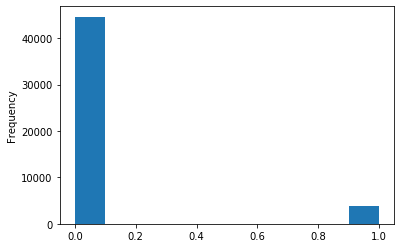

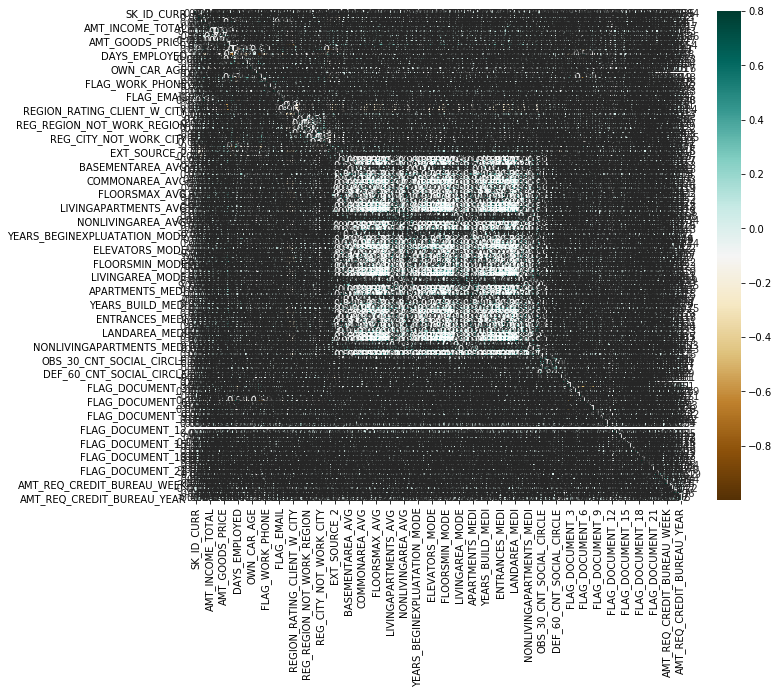

In [3]:
# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
print(app_train.head())
print(app_train.dtypes)
app_train.describe()

# summarize the class distribution
target = app_train['TARGET'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
app_train['TARGET'].astype(int).plot.hist();



In [0]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
        
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
        
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [7]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(50)

Your selected dataframe has 122 columns.
There are 87 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,33895,69.9
COMMONAREA_MODE,33895,69.9
COMMONAREA_MEDI,33895,69.9
NONLIVINGAPARTMENTS_AVG,33649,69.4
NONLIVINGAPARTMENTS_MEDI,33649,69.4
NONLIVINGAPARTMENTS_MODE,33649,69.4
LIVINGAPARTMENTS_MODE,33174,68.4
LIVINGAPARTMENTS_MEDI,33174,68.4
LIVINGAPARTMENTS_AVG,33174,68.4
FONDKAPREMONT_MODE,33149,68.3
